In [91]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [92]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [93]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [94]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [95]:
# Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(autoload_with=engine)
# Use the Base class to reflect the database tables


In [96]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [97]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [98]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [99]:
# Find the most recent date in the data set.
maxDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
maxDate

('2017-08-23',)

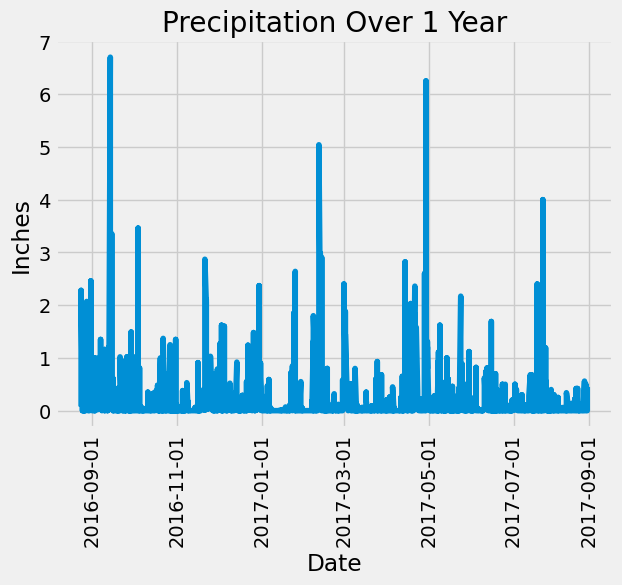

In [100]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
MDdt = dt.datetime.strptime(maxDate[0], '%Y-%m-%d').date() # Sets value to dt type
yearAgo = MDdt - dt.timedelta(days=365) # Modifies value using dt subtracting 1 year
yearAgo = str(yearAgo) # Converts new value back to string

# Perform a query to retrieve the data and precipitation scores
prcpLastYear = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > yearAgo).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcpDF = pd.DataFrame(prcpLastYear, columns=['Date', 'Precipitation'])
prcpDF = prcpDF.dropna(how = 'any') # Cleaning data
# Sort the dataframe by date
prcpDF = prcpDF.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prcpDF['Date'], prcpDF['Precipitation'])
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over 1 Year')
xloc = ['2016-09-01', '2016-11-01', '2017-01-01', '2017-03-01', '2017-05-01', '2017-07-01','2017-09-01']
plt.xticks(xloc, rotation=90)
plt.show()

In [101]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpDF.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [102]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [103]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationCounts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()
stationCounts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activeStation = stationCounts[0][0] # The [0][0] here seperates the station name as a string from its nesting
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == activeStation).all()

[(54.0, 85.0, 71.66378066378067)]

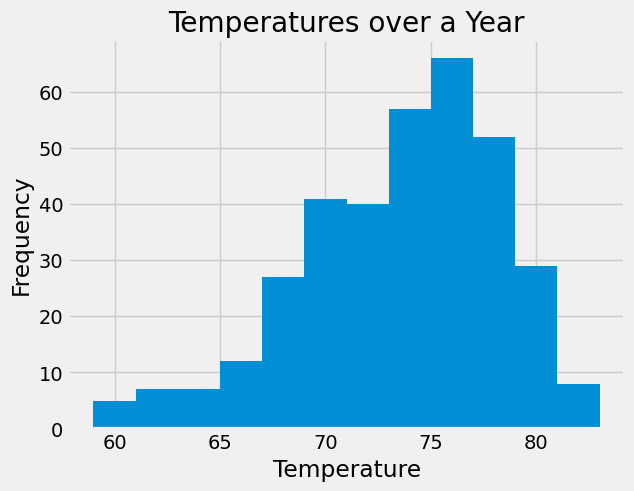

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobsYear = session.query(Measurement.tobs).\
            filter(Measurement.station == activeStation).\
            filter(Measurement.date > yearAgo).all()
Temps = [tem[0] for tem in tobsYear]
plt.grid(True)
plt.hist(Temps, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperatures over a Year')
plt.show()

# Close Session

In [106]:
# Close Session
session.close()
